In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_watermark_roc_and_tpr(watermarked_df: pd.DataFrame, unwatermarked_df: pd.DataFrame):
    # Extract the watermark scores from both DataFrames
    watermarked_scores = watermarked_df['zscore']
    unwatermarked_scores = unwatermarked_df['watermark_score']
    unwatermarked_scores = unwatermarked_scores[:len(watermarked_scores)]
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])

    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def plot_watermark_roc_and_tpr_z(watermarked_scores, unwatermarked_df: pd.DataFrame):
    watermarked_scores = [float(score) for score in watermarked_scores]
    
    # Ensure unwatermarked_scores is a list of floats
    unwatermarked_scores = unwatermarked_df['watermark_score'].astype(float).tolist()
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])

    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def plot_watermark_roc_and_tpr_z_alt(watermarked_scores, unwatermarked_df: pd.DataFrame):
    unwatermarked_scores = unwatermarked_df['watermark_score']

    unwatermarked_scores = unwatermarked_scores[:len(watermarked_scores)]
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])


    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def breakup_attacks(df):
    # Break the DF up into smaller DFs
    dfs = []
    current_df = None

    # Iterate over the rows and split on step_num resets
    for i, row in df.iterrows():
        # Check if the step_num resets to -1, indicating a new sequence
        if row['mutation_num'] == -1:
            if current_df is not None and not current_df.empty:
                dfs.append(current_df.reset_index(drop=True))  # Save the current increasing DF
            current_df = pd.DataFrame([row])  # Start a new DataFrame with the reset row
        else:
            # Append the row to the current DataFrame
            current_df = pd.concat([current_df, pd.DataFrame([row])])

    # Add the last DataFrame if it exists and is non-empty
    if current_df is not None and not current_df.empty:
        dfs.append(current_df.reset_index(drop=True))
    
    return dfs

def breakup_attacks_sandpaper(df):
    # Break the DF up into smaller DFs
    dfs = []
    current_df = None

    # Iterate over the rows and split on step_num resets
    for i, row in df.iterrows():
        # Check if the step_num resets to -1, indicating a new sequence
        if i < len(df) - 1 and df.iloc[i + 1]['step_num'] == 0:
            if current_df is not None and not current_df.empty:
                dfs.append(current_df.reset_index(drop=True))  # Save the current increasing DF
            current_df = pd.DataFrame([row])  # Start a new DataFrame with the reset row
        else:
            # Append the row to the current DataFrame
            current_df = pd.concat([current_df, pd.DataFrame([row])])

    # Add the last DataFrame if it exists and is non-empty
    if current_df is not None and not current_df.empty:
        dfs.append(current_df.reset_index(drop=True))
    
    return dfs

def extract_last_mutated_text(df: pd.DataFrame) -> str:
    # Filter the rows where quality_preserved is True
    filtered_df = df[df['quality_preserved'] == True]
    
    # Check if any row exists
    if not filtered_df.empty:
        # Extract the mutated_text from the last valid row
        return filtered_df.iloc[-1]['mutated_text']
    else:
        return None  # Return None if no row matches

def extract_zscore(df: pd.DataFrame) -> str:    
    # Check if any row exists
    if not df.empty:
        # Filter rows where 'watermark_score' is not -1
        valid_rows = df[df['watermark_score'] != -1]
        
        # Check if any valid rows exist
        if not valid_rows.empty:
            # Extract the mutated_text from the last valid row
            return valid_rows.iloc[-1]['watermark_score']
    
    return None  # Return None if no valid row matches
    
def process_dataframes(df_path: str, unwatermarked_df: pd.DataFrame):
    # Read the CSV file
    semstamp_sentence_df = pd.read_csv(df_path)

    # Break up attacks
    semstamp_sentence_df = breakup_attacks(semstamp_sentence_df)

    # Filter dataframes with at least 5 rows and more than 10 rows where 'quality_preserved' is True
    semstamp_sentence_df = [df for df in semstamp_sentence_df if len(df) >= 5]
    semstamp_sentence_df = [df for df in semstamp_sentence_df if df[df['quality_preserved'] == True].shape[0] > 10]

    # Extract relevant information
    semstamp_sentence_og_texts = [df.iloc[1]['current_text'] for df in semstamp_sentence_df]
    semstamp_sentence_prompts = [df.iloc[-1]['prompt'] for df in semstamp_sentence_df]
    semstamp_sentence_mutated_texts = [extract_last_mutated_text(df) for df in semstamp_sentence_df]
    semstamp_sentence_zscores = [extract_zscore(df) for df in semstamp_sentence_df]

    # Plot the ROC and TPR vs Z-scores
    plot_watermark_roc_and_tpr_z(semstamp_sentence_zscores, unwatermarked_df)

    # plot_watermark_roc_and_tpr_z_alt(semstamp_sentence_zscores, unwatermarked_df)

    # Return relevant information if needed
    # return semstamp_sentence_og_texts, semstamp_sentence_prompts, semstamp_sentence_mutated_texts, semstamp_sentence_zscores

def aggregate_position_wise_means_unnormalized(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['watermark_score'] != -1) & (df['watermark_score'].notna())]['watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists
    max_len = max(len(lst) for lst in extracted_lists)
    # max_len = 10

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst + [np.nan] * (max_len - len(lst)) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    return position_means

def aggregate_position_wise_means_unnormalized_one_less(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['watermark_score'] != -1) & (df['watermark_score'].notna())]['watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists, with -1 adjustment
    max_len = max(len(lst) for lst in extracted_lists) - 1

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst[:max_len] + [np.nan] * max(0, (max_len - len(lst))) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    return position_means

def aggregate_position_wise_means(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['normalized_watermark_score'] != -1) & (df['normalized_watermark_score'].notna())]['normalized_watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists
    # max_len = max(len(lst) for lst in extracted_lists)
    max_len = 10

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst + [np.nan] * (max_len - len(lst)) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    return position_means

def plot_position_means(position_means):
    # Plot the means
    plt.figure(figsize=(10, 6))
    plt.plot(position_means, marker='o', linestyle='-', color='b', label='Position-wise mean')
    plt.title('Position-wise Mean of Watermark Scores')
    plt.xlabel('Position in the list')
    plt.ylabel('Mean Watermark Score')
    plt.grid(True)
    plt.legend()
    plt.show()

def count_lists_with_pattern(dfs):
    # Initialize a counter
    count = 0

    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [df[df['watermark_score'] != -1]['watermark_score'].tolist() for df in dfs]

    # Check each list for the pattern (score drops below 1 and then jumps to 2)
    for lst in extracted_lists:
        found_below_1 = False  # Flag to track if we have seen a score < 1
        found_jump_to_2 = False  # Flag to track if we have seen the jump to 2 after the drop

        for score in lst:
            if score < 1:
                found_below_1 = True  # Mark that we found a score below 1
            if found_below_1 and score == 2:
                found_jump_to_2 = True  # Mark that we found the jump back to 2
                break  # We only need to find one such jump in the list

        if found_below_1 and found_jump_to_2:
            count += 1  # Increment the counter if the pattern is found

    return count

def plot_position_means_list(position_means_list, labels):
    """Plots multiple position-wise means on the same graph."""
    plt.figure(figsize=(10, 6))

    # Plot each set of position means with its corresponding label
    for position_means, label in zip(position_means_list, labels):
        plt.plot(position_means, marker='o', linestyle='-', label=label)

    # Set up the plot details
    plt.title('Position-wise Mean Watermark Scores')
    plt.xlabel('Position in the list')
    plt.ylabel('Mean Watermark Score')
    plt.grid(True)
    plt.legend()
    plt.show()

## Weak Adaptive Attacks Analysis

In [14]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_SpanMutator_n-steps=200_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized_one_less(dfs)
print(position_means)
plot_position_means(position_means)

FileNotFoundError: [Errno 2] No such file or directory: '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_SpanMutator_n-steps=200_attack_results_annotated.csv'

0     89.717253
1     81.990108
2     80.270236
3     76.712607
4     74.621855
5     72.319019
6     70.993174
7     69.722929
8     69.216134
9     67.911841
10    67.336269
dtype: float64


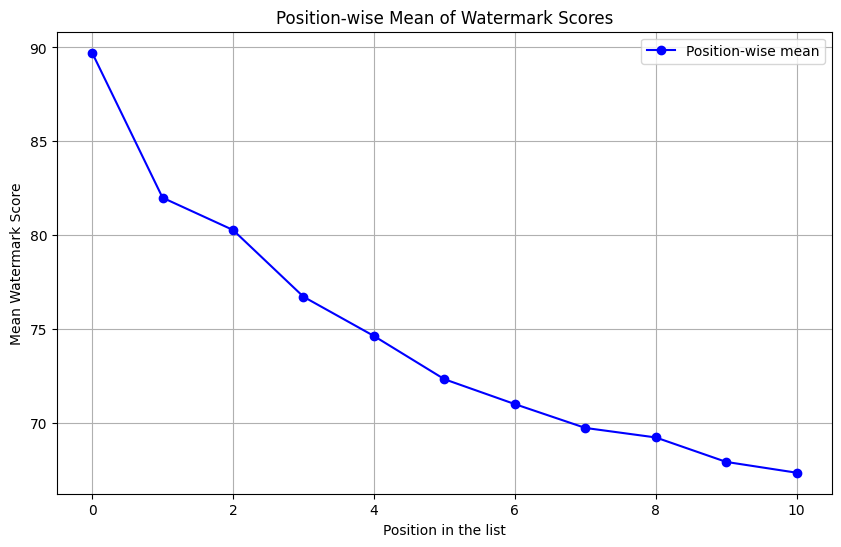

In [18]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_WordMutator_n-steps=200_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized_one_less(dfs)
print(position_means)
plot_position_means(position_means)

0    89.785100
1    65.276922
2    60.245624
3    59.176640
4    58.971355
5    58.098616
dtype: float64


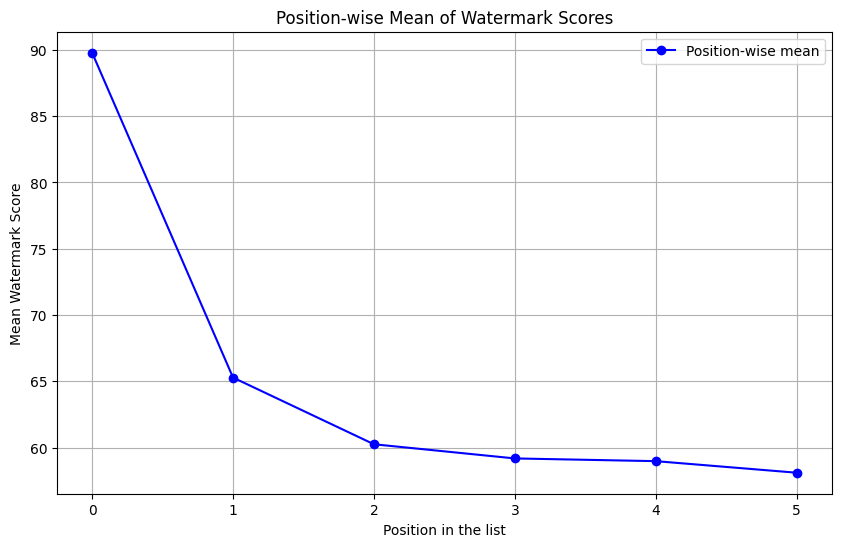

In [19]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_SentenceMutator_n-steps=100_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized_one_less(dfs)
print(position_means)
plot_position_means(position_means)

0     89.717253
1     89.717253
2     84.528912
3     78.424105
4     75.784507
5     74.515589
6     71.605368
7     67.640347
8     64.559404
9     63.836490
10    63.090163
11    62.258833
12    62.842044
13    62.216792
14    61.498024
15    62.138905
16    62.356726
17    62.646788
18    62.452698
19    62.266216
20    61.612777
21    60.931884
22    61.076369
23    60.825901
24    61.061382
dtype: float64


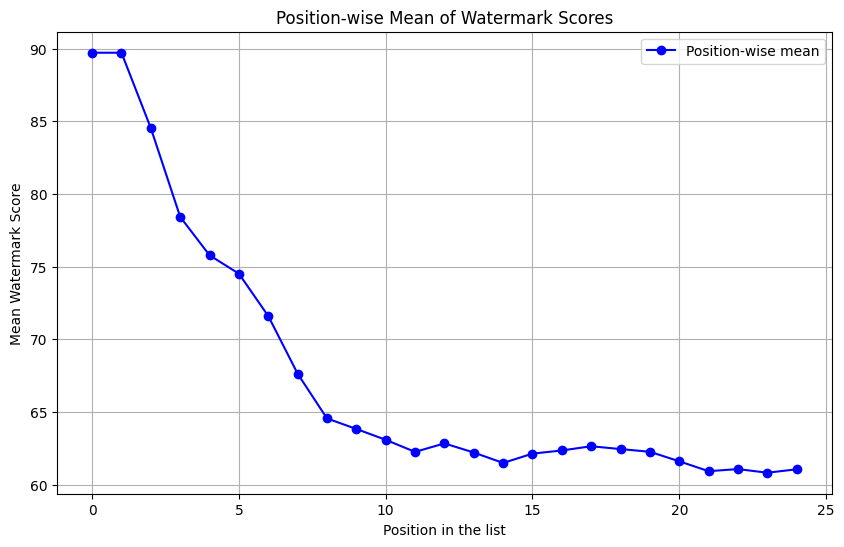

In [22]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_Document1StepMutator_n-steps=100_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized_one_less(dfs)
print(position_means)
plot_position_means(position_means)

0     90.334780
1     90.334780
2     87.086479
3     87.086479
4     76.843680
5     77.295934
6     73.685534
7     72.463883
8     71.318711
9     71.404265
10    70.606014
11    71.811574
12    70.885648
13    71.256892
14    70.651654
dtype: float64


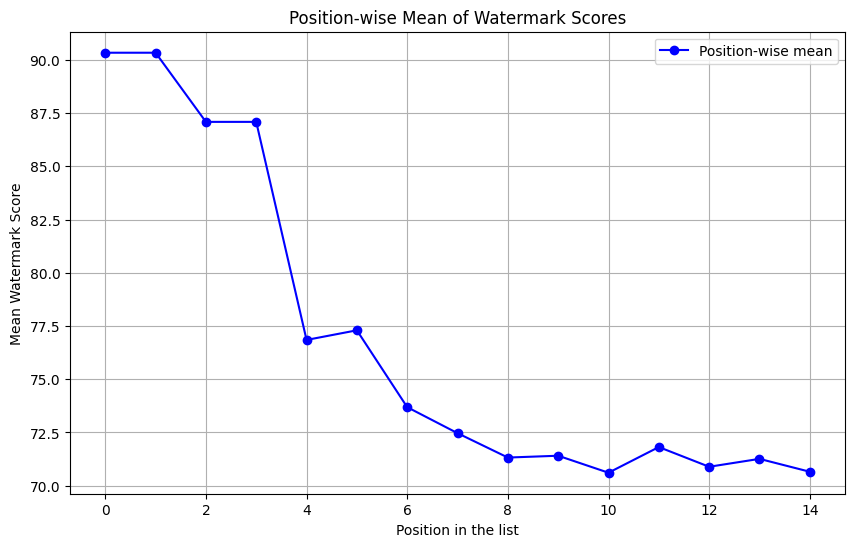

In [17]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_WeakAdaptive_DocumentMutator_n-steps=50_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized_one_less(dfs)
print(position_means)
plot_position_means(position_means)

In [11]:
df = pd.read_csv('/data2/borito1907/impossibility-watermark/unwatermarked_scores/adaptive_detect_unwatermarked_new_params.csv')
df['watermark_score'].mean()

49.84876002584185

In [12]:
df['watermark_score'].std()

7.9397571086379894

In [21]:
(58.098616 - 49.84876002584185) / 7.9397571086379894

1.0390564675061398